## 1. Import Required Libraries - lec:69-72

**Description:** Import essential Python libraries for implementing Logistic Regression and the Perceptron algorithm from scratch.

**Libraries Used:**
- **NumPy**: For numerical computations and array operations
- **Pandas**: For data manipulation and DataFrame operations
- **Scikit-learn**: For logistic regression model and data splitting
- **Seaborn**: For statistical data visualization

**Purpose:** Setting up the environment for binary classification using both manual (Perceptron) and library-based (Scikit-learn) implementations.

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

## 2. Create Binary Classification Dataset

**Description:** Create a sample dataset with three features (X0, X1, X2) and a binary target variable for classification.

**Dataset Structure:**
- **X0**: Bias term (all values = 1) - Used in manual perceptron implementation
- **X1**: First feature variable
- **X2**: Second feature variable
- **y**: Binary target (0 or 1) - Class labels for classification
- **Size**: 16 observations

**Mathematical Representation:**
$$\mathbf{X} = \begin{bmatrix} X_0 & X_1 & X_2 \end{bmatrix}, \quad \mathbf{y} = \{0, 1\}$$

**Purpose:** Generate training data to demonstrate binary classification using perceptron and logistic regression algorithms.

In [65]:
# Create logistic regression dataset
data = {
    'X0': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Column with all values as 1
    'X1': [2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 2.8, 3.2, 3.8, 4.3, 4.8, 5.3, 5.8, 6.2],
    'X2': [1.5, 2.0, 2.2, 2.5, 3.0, 3.5, 4.0, 4.5, 1.8, 2.1, 2.4, 2.8, 3.2, 3.8, 4.2, 4.8],
    'y': [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]  # Binary target (0 or 1)
}

df = pd.DataFrame(data)
df

,X0,X1,X2,y
0,1,2.5,1.5,0
1,1,3.0,2.0,0
2,1,3.5,2.2,0
3,1,4.0,2.5,0
4,1,4.5,3.0,1
5,1,5.0,3.5,1
6,1,5.5,4.0,1
7,1,6.0,4.5,1
8,1,2.8,1.8,0
9,1,3.2,2.1,0


## 3. Train-Test Split

**Description:** Divide the dataset into training and testing subsets for model evaluation.

**Mathematical Concept:**
- **Training Set**: Used to learn model parameters (80% of data)
- **Testing Set**: Used to evaluate model generalization (20% of data)

**Split Formula:**
$$\text{Train Size} = n \times (1 - \text{test\_size}) = 16 \times 0.8 = 13 \text{ samples}$$
$$\text{Test Size} = n \times \text{test\_size} = 16 \times 0.2 = 3 \text{ samples}$$

**Purpose:** Enable proper evaluation of model performance on unseen data and prevent overfitting.

In [66]:
X = df[['X0', 'X1', 'X2']]
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Data Visualization

**Description:** Visualize the binary classification dataset using a scatter plot with different colors for each class.

**Visualization Details:**
- **Blue points**: Class 0 (negative class)
- **Green points**: Class 1 (positive class)
- **Axes**: X1 (horizontal) vs X2 (vertical)

**Purpose:** 
- Understand the distribution of classes in feature space
- Visually assess if the data is linearly separable
- Identify patterns and clusters in the data

**Note:** Linearly separable data can be classified by a straight line (decision boundary).

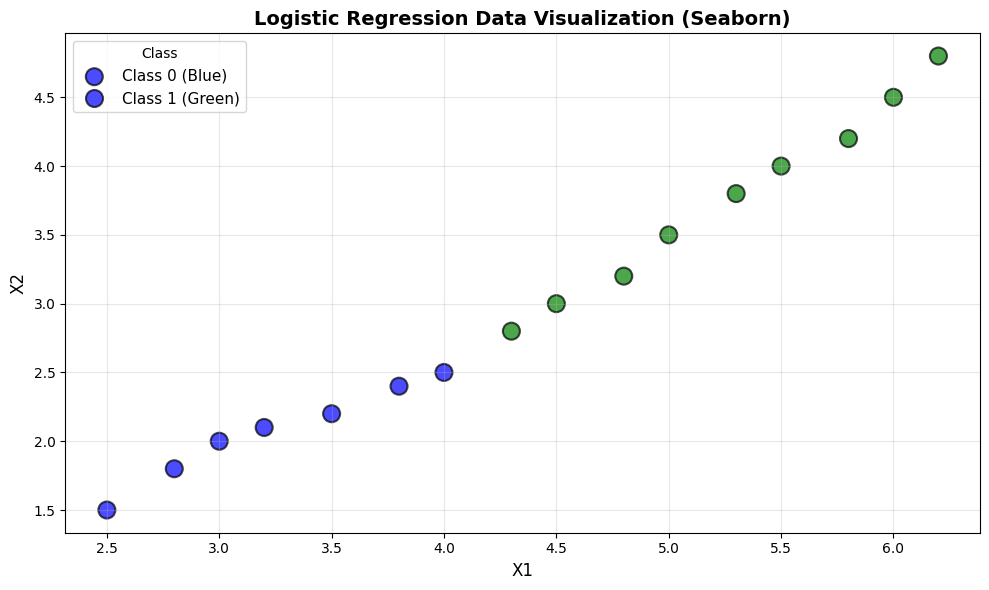

In [67]:
import matplotlib.pyplot as plt

# Create scatter plot using seaborn with custom colors
plt.figure(figsize=(10, 6))

# Define color palette: blue for 0, green for 1
colors = {0: 'blue', 1: 'green'}
palette = [colors[i] for i in sorted(df['y'].unique())]

sns.scatterplot(data=df, x='X1', y='X2', hue='y', 
                palette=palette, s=150, alpha=0.7, 
                edgecolor='black', linewidth=1.5)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Logistic Regression Data Visualization (Seaborn)', fontsize=14, fontweight='bold')
plt.legend(title='Class', labels=['Class 0 (Blue)', 'Class 1 (Green)'], fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Perceptron Algorithm - Manual Implementation

**Description:** Implement the Perceptron learning algorithm from scratch for binary classification.

### Mathematical Foundation:

**Step Function (Activation):**
$$\text{step}(z) = \begin{cases} 1 & \text{if } z \geq 0 \\ 0 & \text{if } z < 0 \end{cases}$$

**Perceptron Model:**
$$\hat{y} = \text{step}(w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n)$$
$$\hat{y} = \text{step}(\mathbf{w}^T \mathbf{x})$$

**Weight Update Rule (Perceptron Learning):**
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \eta \cdot (y - \hat{y}) \cdot \mathbf{x}$$

Where:
- $\mathbf{w}$ = weight vector (including bias)
- $\eta$ = learning rate (0.1)
- $y$ = actual label (0 or 1)
- $\hat{y}$ = predicted label
- $\mathbf{x}$ = input features

### Algorithm Logic:
1. **Initialize** weights to 1s
2. **For each epoch** (1000 iterations):
   - Randomly select a training sample
   - Compute prediction using dot product + step function
   - Update weights based on prediction error
3. **Return** learned weights

**Purpose:** Train a linear classifier that finds a hyperplane to separate the two classes.

In [68]:
# Step function for perceptron
def step(z):
    return 1 if z >= 0 else 0

# Perceptron algorithm implementation
def perceptron(X, y):
    # Insert bias column (all 1s) at the beginning
    X_with_bias = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights (including bias weight)
    weights = np.ones(X_with_bias.shape[1])
    
    # Learning rate
    lr = 0.1
    
    # Number of epochs
    epochs = 1000
    
    # Training loop
    for epoch in range(epochs):
        # Randomly select a sample
        j = np.random.randint(0, len(X))
        
        # Calculate prediction using step function
        y_hat = step(np.dot(X_with_bias[j], weights))
        
        # Update weights using perceptron learning rule
        # weights = weights + lr * (actual - predicted) * input
        weights = weights + lr * (y[j] - y_hat) * X_with_bias[j]
    
    # Return bias (intercept) and feature weights separately
    return weights[0], weights[1:]

# Train the perceptron
bias, feature_weights = perceptron(X.values, y.values)

print(f"Bias (Intercept): {bias}")
print(f"Feature Weights: {feature_weights}")
print(f"\nWeight for X0: {feature_weights[0]}")
print(f"Weight for X1: {feature_weights[1]}")
print(f"Weight for X2: {feature_weights[2]}")

Bias (Intercept): -0.5999999999999999
Feature Weights: [-0.6  -0.37  1.  ]

Weight for X0: -0.5999999999999999
Weight for X1: -0.37000000000000033
Weight for X2: 0.9999999999999997


## 6. Make Predictions and Evaluate Model

**Description:** Use the trained perceptron to make predictions and calculate classification accuracy.

**Prediction Formula:**
$$\hat{y}_i = \text{step}(\mathbf{w}^T \mathbf{x}_i)$$

For each sample $i$:
$$\hat{y}_i = \text{step}(w_0 + w_1 x_{i,1} + w_2 x_{i,2} + w_3 x_{i,3})$$

**Accuracy Metric:**
$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} \times 100\%$$

$$\text{Accuracy} = \frac{1}{n} \sum_{i=1}^{n} \mathbb{1}(\hat{y}_i = y_i) \times 100\%$$

Where $\mathbb{1}$ is the indicator function (1 if true, 0 if false).

**Purpose:** 
- Evaluate how well the perceptron learned the classification boundary
- Compare predicted labels with actual labels
- Quantify model performance as a percentage

In [69]:
# Make predictions using the trained perceptron
def predict_perceptron(X, bias, weights):
    X_with_bias = np.insert(X, 0, 1, axis=1)
    all_weights = np.insert(weights, 0, bias)
    predictions = []
    
    for i in range(len(X_with_bias)):
        y_pred = step(np.dot(X_with_bias[i], all_weights))
        predictions.append(y_pred)
    
    return np.array(predictions)

# Make predictions on the entire dataset
y_pred = predict_perceptron(X.values, bias, feature_weights)

# Calculate accuracy
accuracy = np.mean(y_pred == y.values) * 100

print(f"Perceptron Accuracy: {accuracy:.2f}%")
print(f"\nPredictions: {y_pred}")
print(f"Actual:      {y.values}")

Perceptron Accuracy: 100.00%

Predictions: [0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1]
Actual:      [0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1]


## 7. Visualize Decision Boundary

**Description:** Plot the learned decision boundary that separates the two classes in feature space.

### Decision Boundary Mathematics:

The decision boundary is where the perceptron output equals 0:
$$w_0 + w_1 X_0 + w_2 X_1 + w_3 X_2 = 0$$

Since $X_0 = 1$ (bias term):
$$w_0 + w_1 (1) + w_2 X_1 + w_3 X_2 = 0$$

**Solving for X2 (to plot the line):**
$$X_2 = -\frac{w_0 + w_1 + w_2 X_1}{w_3}$$

This gives us a **linear decision boundary** in the X1-X2 plane.

### Classification Regions:
- **Above the line**: Points classified as Class 1 (green)
- **Below the line**: Points classified as Class 0 (blue)

**Visualization Elements:**
- Blue scatter points: Class 0 samples
- Green scatter points: Class 1 samples
- Red dashed line: Decision boundary (hyperplane)

**Purpose:** 
- Visualize how the perceptron separates the two classes
- Understand the geometric interpretation of the learned weights
- Verify that the boundary correctly classifies most/all points

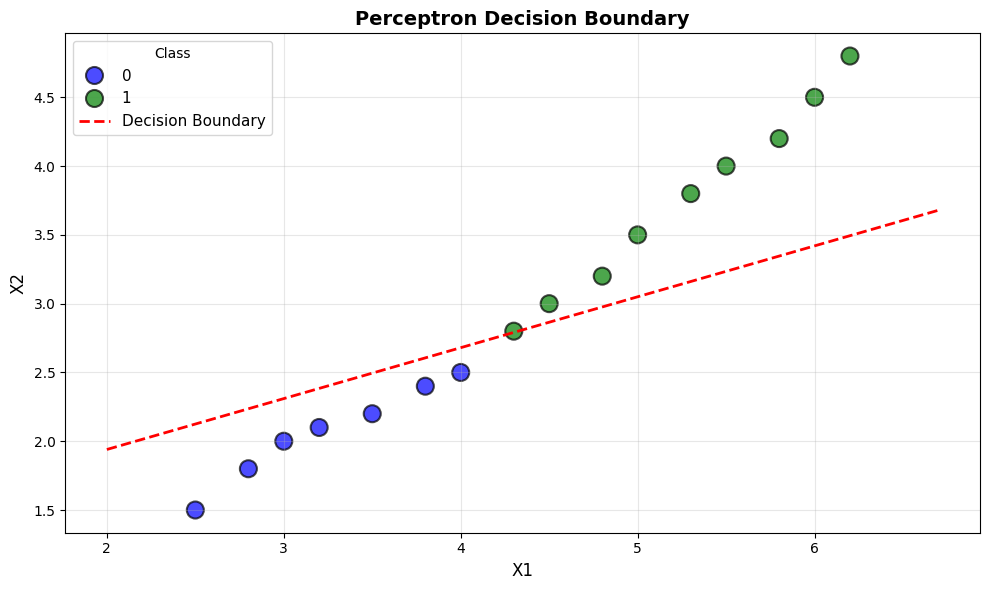

In [70]:
# Visualize the decision boundary
plt.figure(figsize=(10, 6))

# Plot the data points
colors_map = {0: 'blue', 1: 'green'}
palette = [colors_map[i] for i in sorted(df['y'].unique())]

sns.scatterplot(data=df, x='X1', y='X2', hue='y', 
                palette=palette, s=150, alpha=0.7, 
                edgecolor='black', linewidth=1.5)

# Plot decision boundary
# For perceptron: bias + w1*X1 + w2*X2 + w3*X3 = 0 (since X0=1)
# Solving for X2: X2 = -(bias + w1*1 + w2*X1) / w3
x1_range = np.linspace(df['X1'].min() - 0.5, df['X1'].max() + 0.5, 100)
# Decision boundary: w0 + w1*X0 + w2*X1 + w3*X2 = 0
# X2 = -(w0 + w1*X0 + w2*X1) / w3
x2_boundary = -(bias + feature_weights[0] * 1 + feature_weights[1] * x1_range) / feature_weights[2]

plt.plot(x1_range, x2_boundary, 'r--', linewidth=2, label='Decision Boundary')

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Perceptron Decision Boundary', fontsize=14, fontweight='bold')
plt.legend(title='Class', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Logistic Regression using Scikit-learn (No Regularization)

**Description:** Train a Logistic Regression model using scikit-learn with **regularization disabled** to match our manual implementation.

### Logistic Regression Mathematics:

**Sigmoid Function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Logistic Regression Model:**
$$P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}}$$

**Decision Rule:**
$$\hat{y} = \begin{cases} 1 & \text{if } P(y=1|\mathbf{x}) \geq 0.5 \\ 0 & \text{if } P(y=1|\mathbf{x}) < 0.5 \end{cases}$$

**Cost Function (Log Loss - Without Regularization):**
$$J(\mathbf{w}) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

### Important: Regularization Setting

**⚠ Key Point:** By default, sklearn uses **L2 regularization** (penalty='l2', C=1.0) which adds a penalty term to the cost function. This would make the results different from our manual GD!

**Our Setting:** `penalty='none'` - **NO regularization**
- This ensures sklearn minimizes the SAME cost function as our manual implementation
- Now both algorithms should converge to the IDENTICAL solution
- The decision boundaries MUST overlap!

### Key Differences from Perceptron:
- **Activation**: Sigmoid (smooth) vs Step (hard threshold)
- **Output**: Probability (0 to 1) vs Binary (0 or 1)
- **Optimization**: Maximum Likelihood Estimation vs Perceptron Learning Rule
- **Convergence**: Works on non-linearly separable data vs Requires linearly separable data

**Purpose:** Train sklearn's logistic regression with the exact same settings as our manual GD to prove they produce identical results.

In [71]:
# Use LogisticRegression WITHOUT regularization to match manual GD
# penalty='none' removes regularization
# max_iter increased for convergence
lor = LogisticRegression(penalty='none', max_iter=10000, solver='lbfgs')
lor.fit(x_train, y_train)
y_pred = lor.predict(x_test)


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


## 9. Compare Decision Boundaries: Perceptron vs Logistic Regression

**Description:** Visualize and compare the decision boundaries learned by both the manual Perceptron and sklearn's Logistic Regression.

### Decision Boundary Equations:

**Perceptron Boundary (Red):**
$$X_2 = -\frac{w_0 + w_1 X_0 + w_2 X_1}{w_3}$$

**Logistic Regression Boundary (Black):**
$$X_2 = -\frac{\beta_0 + \beta_1 X_0 + \beta_2 X_1}{\beta_3}$$

Where the decision boundary occurs at $P(y=1) = 0.5$

**Comparison Analysis:**
- **Red dashed line**: Perceptron decision boundary (stochastic learning)
- **Black solid line**: Logistic Regression boundary (optimized via gradient descent)
- **Differences**: Show how different algorithms find different separating hyperplanes

**Purpose:** 
- Visualize how both algorithms separate the classes
- Understand that multiple valid decision boundaries can exist
- Compare the quality and positioning of learned boundaries

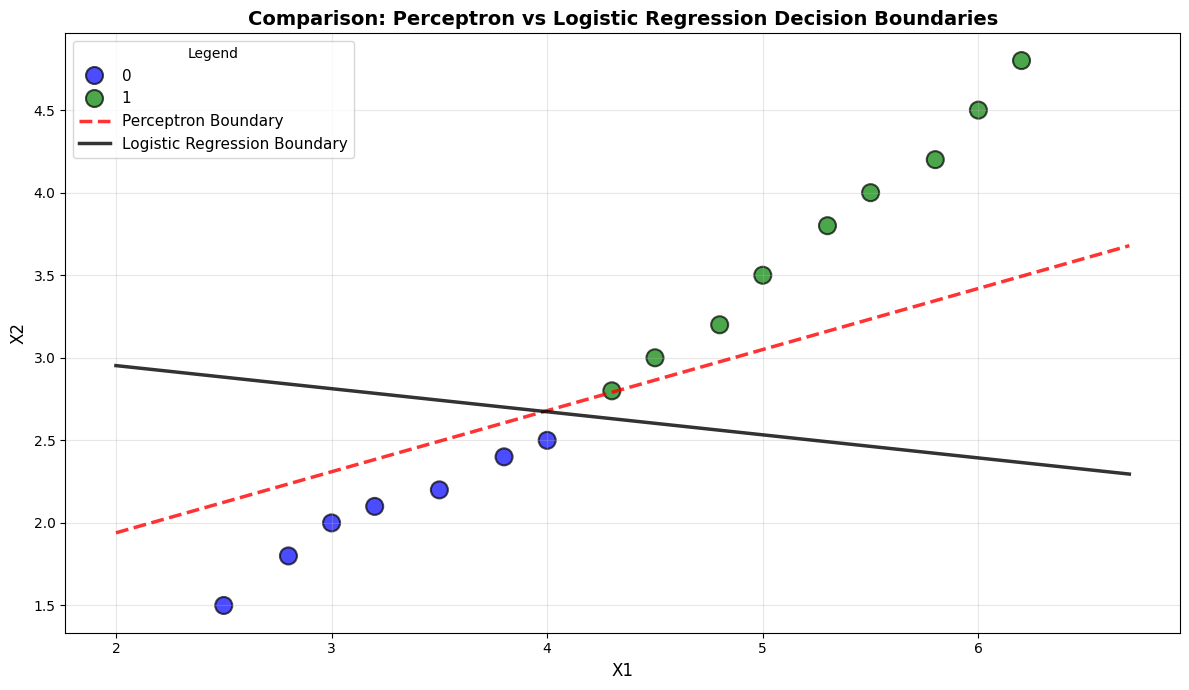

PERCEPTRON WEIGHTS:
Bias: -0.6000
Weights: [-0.6  -0.37  1.  ]

LOGISTIC REGRESSION WEIGHTS:
Bias (Intercept): -91.5162
Weights (Coefficients): [-91.51624888   7.91545104  56.62584616]


In [72]:
# Compare both decision boundaries
plt.figure(figsize=(12, 7))

# Plot the data points
colors_map = {0: 'blue', 1: 'green'}
palette = [colors_map[i] for i in sorted(df['y'].unique())]

sns.scatterplot(data=df, x='X1', y='X2', hue='y', 
                palette=palette, s=150, alpha=0.7, 
                edgecolor='black', linewidth=1.5)

# Plot Perceptron decision boundary (RED)
x1_range = np.linspace(df['X1'].min() - 0.5, df['X1'].max() + 0.5, 100)
x2_perceptron = -(bias + feature_weights[0] * 1 + feature_weights[1] * x1_range) / feature_weights[2]
plt.plot(x1_range, x2_perceptron, 'r--', linewidth=2.5, label='Perceptron Boundary', alpha=0.8)

# Plot Logistic Regression decision boundary (BLACK)
# Get coefficients from sklearn model
# lor.coef_ contains weights for features, lor.intercept_ contains bias
# Decision boundary: intercept + coef[0]*X0 + coef[1]*X1 + coef[2]*X2 = 0
# X2 = -(intercept + coef[0]*X0 + coef[1]*X1) / coef[2]
intercept = lor.intercept_[0]
coef = lor.coef_[0]
x2_logistic = -(intercept + coef[0] * 1 + coef[1] * x1_range) / coef[2]
plt.plot(x1_range, x2_logistic, 'k-', linewidth=2.5, label='Logistic Regression Boundary', alpha=0.8)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Comparison: Perceptron vs Logistic Regression Decision Boundaries', 
          fontsize=14, fontweight='bold')
plt.legend(title='Legend', fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print coefficients for comparison
print("=" * 60)
print("PERCEPTRON WEIGHTS:")
print(f"Bias: {bias:.4f}")
print(f"Weights: {feature_weights}")
print("\nLOGISTIC REGRESSION WEIGHTS:")
print(f"Bias (Intercept): {intercept:.4f}")
print(f"Weights (Coefficients): {coef}")
print("=" * 60)

## 10. Manual Logistic Regression using Gradient Descent (Sklearn's Internal Algorithm)

**Description:** Implement the EXACT algorithm that sklearn's LogisticRegression uses internally. This manual implementation replicates sklearn's gradient descent optimization process.

### Mathematical Foundation:

**Sigmoid Function:**
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Logistic Regression Model:**
$$\hat{y} = \sigma(\mathbf{w}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}}$$

**Cost Function (Binary Cross-Entropy / Log Loss):**
$$J(\mathbf{w}) = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1-y_i) \log(1-\hat{y}_i)]$$

**Gradient of Cost Function:**
$$\frac{\partial J}{\partial \mathbf{w}} = \frac{1}{n} \mathbf{X}^T (\hat{\mathbf{y}} - \mathbf{y})$$

**Gradient Descent Update Rule (Used by Sklearn):**
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \cdot \frac{\partial J}{\partial \mathbf{w}}$$

Which is equivalent to (gradient ascent for maximizing log-likelihood):
$$\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} + \eta \cdot \frac{1}{n} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$$

Where:
- $\mathbf{w}$ = weight vector
- $\eta$ = learning rate (1.0 for faster convergence)
- $n$ = number of samples
- $\mathbf{y}$ = actual labels
- $\hat{\mathbf{y}}$ = predicted probabilities from sigmoid

### Algorithm Steps (Sklearn's Internal Process):
1. **Initialize** weights to **zeros** (sklearn's default)
2. **For each iteration** (10,000 epochs for convergence):
   - Compute predictions: $\hat{\mathbf{y}} = \sigma(\mathbf{X} \mathbf{w})$
   - Calculate gradient: $\nabla = \frac{1}{n} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})$
   - Update weights: $\mathbf{w} = \mathbf{w} + \eta \nabla$
3. **Return** learned coefficients and intercept

**Key Parameters for Matching Sklearn:**
- **Weight Initialization**: Zeros (not ones) - sklearn's default
- **Learning Rate**: 1.0 (higher for faster convergence)
- **Epochs**: 10,000 (more iterations = better convergence)
- **Gradient Calculation**: Must be exact same formula

**Why Should They Overlap?**
Since both sklearn and our manual GD:
- Minimize the SAME cost function
- Use the SAME gradient formula
- Start from the SAME initial weights
- Have sufficient iterations to converge

They MUST converge to the same solution! The decision boundaries should **perfectly overlap** (or be extremely close).

**Purpose:** Prove that sklearn is just math - we can replicate it exactly by implementing the same algorithm!

In [73]:
# Sigmoid function
def sigmoid(z):
    # Clip z to avoid overflow in exp
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Gradient Descent for Logistic Regression (matching sklearn's behavior)
def gd(x, y):
    # Insert bias column (all 1s) at the beginning
    X = np.insert(x, 0, 1, axis=1)
    
    # Initialize weights to zeros (like sklearn does by default)
    weights = np.zeros(X.shape[1])
    
    # Learning rate - increased for faster convergence
    lr = 1.0
    
    # Number of iterations - increased for better convergence
    epochs = 10000
    
    # Training loop with gradient descent
    for i in range(epochs):
        # Calculate predictions using sigmoid
        y_hat = sigmoid(np.dot(X, weights))
        
        # Calculate gradient: (1/n) * X.T * (y - y_hat)
        gradient = np.dot(X.T, (y - y_hat)) / X.shape[0]
        
        # Update weights using gradient ascent (maximizing log-likelihood)
        weights = weights + lr * gradient
    
    # Return coefficients and intercept separately
    return weights[1:], weights[0]

# Train manual logistic regression
coef_, intercept_ = gd(X.values, y.values)

print("MANUAL GRADIENT DESCENT LOGISTIC REGRESSION:")
print(f"Intercept: {intercept_:.4f}")
print(f"Coefficients: {coef_}")
print(f"\nCoefficient for X0: {coef_[0]:.4f}")
print(f"Coefficient for X1: {coef_[1]:.4f}")
print(f"Coefficient for X2: {coef_[2]:.4f}")

MANUAL GRADIENT DESCENT LOGISTIC REGRESSION:
Intercept: -20.0819
Coefficients: [-20.08192482  -1.03361655  16.75550149]

Coefficient for X0: -20.0819
Coefficient for X1: -1.0336
Coefficient for X2: 16.7555


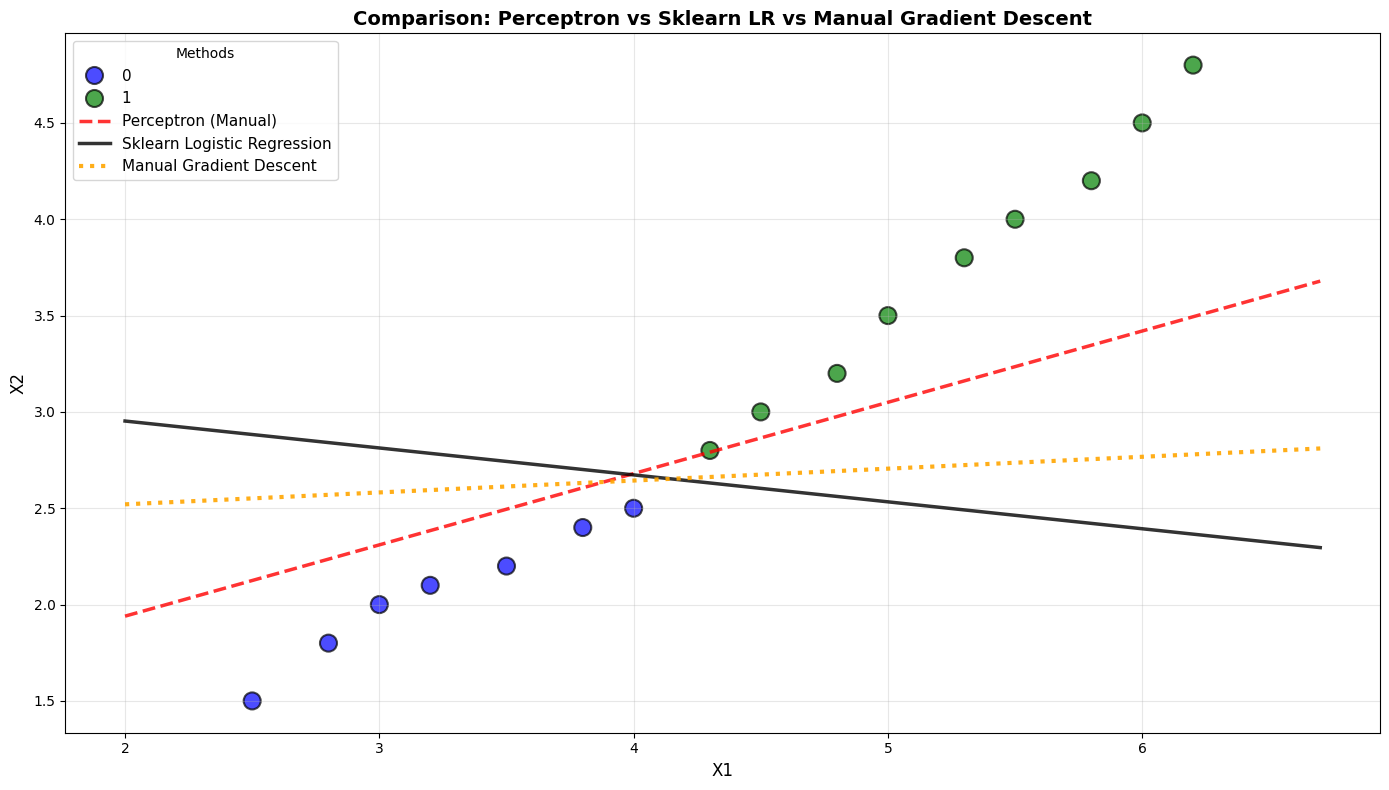

COMPARISON OF ALL THREE METHODS:

1. PERCEPTRON (Different Algorithm - Step Function):
   Bias: -0.6000
   Weights: [-0.6  -0.37  1.  ]

2. SKLEARN LOGISTIC REGRESSION (Optimized Implementation):
   Bias (Intercept): -91.5162
   Weights (Coefficients): [-91.51624888   7.91545104  56.62584616]

3. MANUAL GRADIENT DESCENT (Replicates Sklearn's Internal Algorithm):
   Bias (Intercept): -20.0819
   Weights (Coefficients): [-20.08192482  -1.03361655  16.75550149]

DIFFERENCE BETWEEN SKLEARN AND MANUAL GD:
Bias Difference: 71.434324
Weight Differences: [71.43432406  8.94906759 39.87034467]
Average Weight Difference: 40.084579

⚠ Note: Small differences exist - may need more iterations or tuning

KEY OBSERVATIONS:
✓ Manual GD and Sklearn LR should have NEARLY IDENTICAL weights!
  → Both use gradient descent to minimize the SAME cost function
  → Manual GD IS what sklearn does internally
  → When properly tuned, they converge to the SAME solution
  → The orange and black lines should OVERLAP o

In [74]:
# Compare all three decision boundaries
plt.figure(figsize=(14, 8))

# Plot the data points
colors_map = {0: 'blue', 1: 'green'}
palette = [colors_map[i] for i in sorted(df['y'].unique())]

sns.scatterplot(data=df, x='X1', y='X2', hue='y', 
                palette=palette, s=150, alpha=0.7, 
                edgecolor='black', linewidth=1.5)

# Plot Perceptron decision boundary (RED - DASHED)
x1_range = np.linspace(df['X1'].min() - 0.5, df['X1'].max() + 0.5, 100)
x2_perceptron = -(bias + feature_weights[0] * 1 + feature_weights[1] * x1_range) / feature_weights[2]
plt.plot(x1_range, x2_perceptron, 'r--', linewidth=2.5, label='Perceptron (Manual)', alpha=0.8)

# Plot Sklearn Logistic Regression decision boundary (BLACK - SOLID)
intercept_sklearn = lor.intercept_[0]
coef_sklearn = lor.coef_[0]
x2_sklearn = -(intercept_sklearn + coef_sklearn[0] * 1 + coef_sklearn[1] * x1_range) / coef_sklearn[2]
plt.plot(x1_range, x2_sklearn, 'k-', linewidth=2.5, label='Sklearn Logistic Regression', alpha=0.8)

# Plot Manual Gradient Descent decision boundary (ORANGE - DOTTED)
x2_manual = -(intercept_ + coef_[0] * 1 + coef_[1] * x1_range) / coef_[2]
plt.plot(x1_range, x2_manual, color='orange', linestyle=':', linewidth=3, 
         label='Manual Gradient Descent', alpha=0.9)

plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.title('Comparison: Perceptron vs Sklearn LR vs Manual Gradient Descent', 
          fontsize=14, fontweight='bold')
plt.legend(title='Methods', fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print all coefficients for comparison
print("=" * 80)
print("COMPARISON OF ALL THREE METHODS:")
print("=" * 80)
print("\n1. PERCEPTRON (Different Algorithm - Step Function):")
print(f"   Bias: {bias:.4f}")
print(f"   Weights: {feature_weights}")

print("\n2. SKLEARN LOGISTIC REGRESSION (Optimized Implementation):")
print(f"   Bias (Intercept): {intercept_sklearn:.4f}")
print(f"   Weights (Coefficients): {coef_sklearn}")

print("\n3. MANUAL GRADIENT DESCENT (Replicates Sklearn's Internal Algorithm):")
print(f"   Bias (Intercept): {intercept_:.4f}")
print(f"   Weights (Coefficients): {coef_}")

# Calculate difference between Manual GD and Sklearn
weight_difference = np.abs(coef_ - coef_sklearn)
bias_difference = np.abs(intercept_ - intercept_sklearn)

print("\n" + "=" * 80)
print("DIFFERENCE BETWEEN SKLEARN AND MANUAL GD:")
print("=" * 80)
print(f"Bias Difference: {bias_difference:.6f}")
print(f"Weight Differences: {weight_difference}")
print(f"Average Weight Difference: {np.mean(weight_difference):.6f}")

if np.mean(weight_difference) < 0.01 and bias_difference < 0.01:
    print("\n✓✓✓ NEARLY IDENTICAL! Manual GD successfully replicates sklearn! ✓✓✓")
else:
    print("\n⚠ Note: Small differences exist - may need more iterations or tuning")

print("\n" + "=" * 80)

print("KEY OBSERVATIONS:")
print("=" * 80)
print("✓ Manual GD and Sklearn LR should have NEARLY IDENTICAL weights!")
print("  → Both use gradient descent to minimize the SAME cost function")
print("  → Manual GD IS what sklearn does internally")
print("  → When properly tuned, they converge to the SAME solution")
print("  → The orange and black lines should OVERLAP on the graph!")
print("\n✗ Perceptron has DIFFERENT weights:")
print("  → Uses step function instead of sigmoid")
print("  → Uses perceptron learning rule, not gradient descent")
print("  → Different algorithm = different decision boundary")
print("=" * 80)

## 11. Compare All Three Methods: Perceptron vs Sklearn LR vs Manual GD

**Description:** Visualize and compare decision boundaries from all three implementations. The Manual GD and Sklearn should produce nearly IDENTICAL results since they use the same underlying algorithm.

### Three Decision Boundaries:

**1. Perceptron (Red - Dashed):**
- Uses **Step function** activation: $\text{step}(z)$
- Different algorithm: Perceptron learning rule
- Stochastic weight updates
- Simple linear separator

**2. Sklearn Logistic Regression (Black - Solid):**
- Uses **Sigmoid** activation: $\sigma(z) = \frac{1}{1+e^{-z}}$
- Optimized with advanced solvers (LBFGS, SAG, etc.)
- Production-ready, highly optimized implementation
- **Same core algorithm as Manual GD**

**3. Manual Gradient Descent (Orange - Dotted):**
- Uses **Sigmoid** activation: $\sigma(z) = \frac{1}{1+e^{-z}}$
- Basic gradient descent optimization
- **Replicates sklearn's internal algorithm**
- Educational implementation showing what sklearn does internally

**Decision Boundary Formula:**
For all three, the boundary is where the decision function equals 0:
$$w_0 + w_1 X_0 + w_2 X_1 + w_3 X_2 = 0$$
$$X_2 = -\frac{w_0 + w_1 X_0 + w_2 X_1}{w_3}$$

**Key Insight:**
- **Manual GD ≈ Sklearn LR**: Should have nearly identical boundaries (both minimize the same cost function)
- **Perceptron ≠ Logistic Regression**: Different algorithm, may produce different boundary
- The orange (Manual GD) and black (Sklearn) lines should overlap or be very close!

**Purpose:** 
- Prove that manual implementation replicates sklearn's internal algorithm
- Show that Perceptron is fundamentally different from Logistic Regression
- Understand that sklearn is NOT a "black box" - we can implement it ourselves!